In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
airlines = pd.read_csv('EastWestAirlines.csv')
airlines.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [3]:
airlines = airlines.rename(columns={'Unnamed: 1': 'Balance',
                                    'Unnamed: 2': 'Qual_miles',
                                    'Unnamed: 3': 'cc1_miles',
                                    'Unnamed: 4': 'cc2_miles'})

In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Balance                                                                                13 non-null     object
 2   Qual_miles                                                                             6 non-null      object
 3   cc1_miles                                                                              13 non-null     object
 4   cc2_miles                                                                              18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [5]:
airlines

,East-West Airlines is trying to learn more about its customers. Key issues are their,Balance,Qual_miles,cc1_miles,cc2_miles
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [6]:
# Check the data types of each column
print(airlines.dtypes)

East-West Airlines is trying to learn more about its customers.  Key issues are their    object
Balance                                                                                  object
Qual_miles                                                                               object
cc1_miles                                                                                object
cc2_miles                                                                                object
dtype: object


In [7]:

# Check for missing values
print(airlines.isnull().sum())

East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Balance                                                                                  13
Qual_miles                                                                               20
cc1_miles                                                                                13
cc2_miles                                                                                 8
dtype: int64


In [8]:
# Convert categorical variables to numeric values
airlines = pd.get_dummies(airlines)

In [9]:
airlines

,East-West Airlines is trying to learn more about its customers. Key issues are their_ note: miles bins:,East-West Airlines is trying to learn more about its customers. Key issues are their_(c) 2016 Galit Shmueli and Peter Bruce,East-West Airlines is trying to learn more about its customers. Key issues are their_Award?,East-West Airlines is trying to learn more about its customers. Key issues are their_Balance,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_miles,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_trans,East-West Airlines is trying to learn more about its customers. Key issues are their_Days_since_enroll,East-West Airlines is trying to learn more about its customers. Key issues are their_Field Name,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_miles_12mo,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_trans_12,...,cc2_miles_Number of flight miles in the past 12 months,cc2_miles_Number of flight transactions in the past 12 months,cc2_miles_Number of miles counted as qualifying for Topflight status,cc2_miles_Number of miles earned from non-flight bonus transactions in the past 12 months,cc2_miles_Number of miles earned with Rewards credit card in the past 12 months:,cc2_miles_Number of miles earned with Small Business credit card in the past 12 months:,cc2_miles_Number of miles earned with freq. flyer credit card in the past 12 months:,cc2_miles_Number of miles eligible for award travel,cc2_miles_Number of non-flight bonus transactions in the past 12 months,cc2_miles_Unique ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Handle the error with a try-except block
for i in range(len(airlines)):
    try:
        airlines.iloc[i] = airlines.iloc[i].astype(float)
    except ValueError:
        airlines.iloc[i] = np.nan


In [11]:
# Drop rows with missing values
airlines.dropna(inplace=True)

In [12]:
airlines

,East-West Airlines is trying to learn more about its customers. Key issues are their_ note: miles bins:,East-West Airlines is trying to learn more about its customers. Key issues are their_(c) 2016 Galit Shmueli and Peter Bruce,East-West Airlines is trying to learn more about its customers. Key issues are their_Award?,East-West Airlines is trying to learn more about its customers. Key issues are their_Balance,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_miles,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_trans,East-West Airlines is trying to learn more about its customers. Key issues are their_Days_since_enroll,East-West Airlines is trying to learn more about its customers. Key issues are their_Field Name,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_miles_12mo,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_trans_12,...,cc2_miles_Number of flight miles in the past 12 months,cc2_miles_Number of flight transactions in the past 12 months,cc2_miles_Number of miles counted as qualifying for Topflight status,cc2_miles_Number of miles earned from non-flight bonus transactions in the past 12 months,cc2_miles_Number of miles earned with Rewards credit card in the past 12 months:,cc2_miles_Number of miles earned with Small Business credit card in the past 12 months:,cc2_miles_Number of miles earned with freq. flyer credit card in the past 12 months:,cc2_miles_Number of miles eligible for award travel,cc2_miles_Number of non-flight bonus transactions in the past 12 months,cc2_miles_Unique ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# Preprocessing and Standardizing the data
scaler = StandardScaler()
airlines_scaled = scaler.fit_transform(airlines.iloc[:,1:])

# HIERARCHIAL CLUSTERING

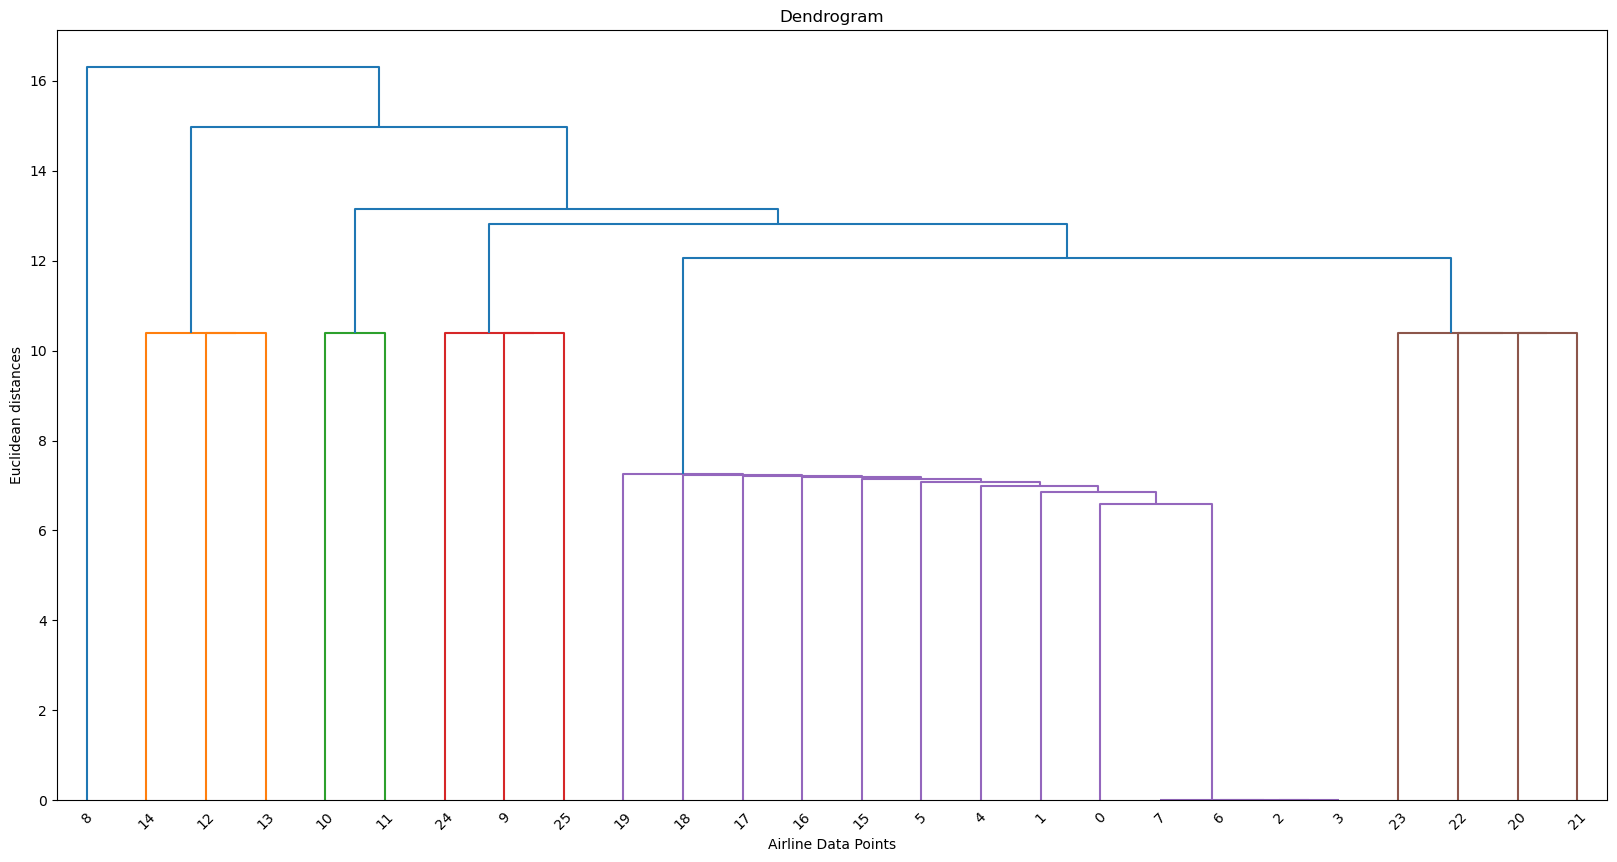

In [14]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(airlines_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Airline Data Points')
plt.ylabel('Euclidean distances')
plt.show()

# AGGLOMERATIVE CLUSTERING

In [15]:
# Applying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

# K-MEANS CLUSTERING

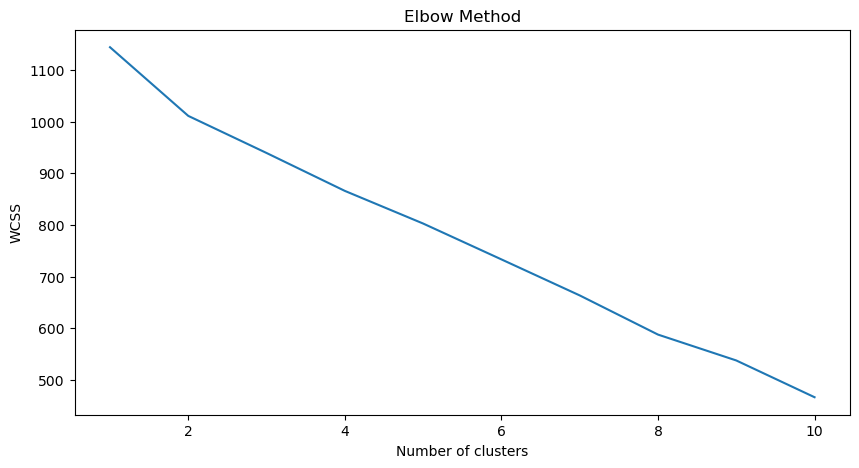

In [16]:
# Elbow Method for K-means Clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(airlines_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Applying K-means Clustering
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(airlines_scaled)

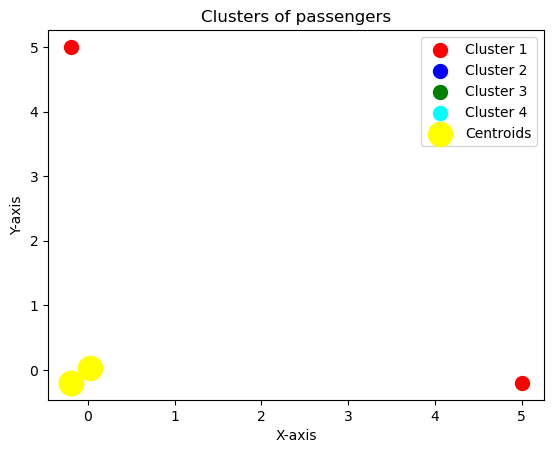

In [18]:
# Visualizing the Clusters
plt.scatter(airlines_scaled[y_kmeans == 0, 0], airlines_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(airlines_scaled[y_kmeans == 1, 0], airlines_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(airlines_scaled[y_kmeans == 2, 0], airlines_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(airlines_scaled[y_kmeans == 3, 0], airlines_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of passengers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

# DBSCAN

In [19]:
# Applying DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(airlines_scaled)

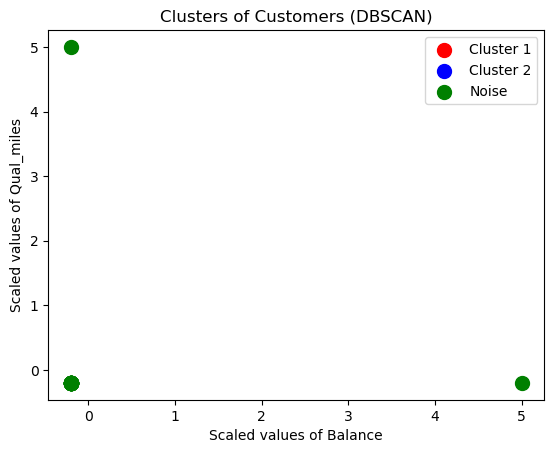

In [20]:
# Visualizing the Clusters
plt.scatter(airlines_scaled[y_dbscan == 0, 0], airlines_scaled[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(airlines_scaled[y_dbscan == 1, 0], airlines_scaled[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(airlines_scaled[y_dbscan == -1, 0], airlines_scaled[y_dbscan == -1, 1], s = 100, c = 'green', label = 'Noise')
plt.title('Clusters of Customers (DBSCAN)')
plt.xlabel('Scaled values of Balance')
plt.ylabel('Scaled values of Qual_miles')
plt.legend()
plt.show()